In [87]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from  tqdm import tqdm
import plotly.graph_objects as go

import contextlib

@contextlib.contextmanager
def printoptions(*args, **kwargs):
    original = np.get_printoptions()
    np.set_printoptions(*args, **kwargs)
    try:
        yield
    finally: 
        np.set_printoptions(**original)


In [88]:
import sys
sys.path.append("../../src/")

In [89]:
%load_ext autoreload
%autoreload 2

from qeview.qe_analyse_FM import qe_analyse_FM
import qeview.wannier_loader as wnldr 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
Ang2Bohr = 1.8897259886
Bohr2Ang = 1./Ang2Bohr


# QE

In [66]:
calc = qe_analyse_FM('./', 'FeCl2')

efermi -1.97
Unit Cell Volume:   212.9083  (Ang^3)
alat 3.4700
Reciprocal-Space Vectors cart (Ang^-1)
[[ 1.7921067783  1.0346733309 -0.          ]
 [ 0.            2.0693466617  0.          ]
 [ 0.           -0.            0.3141592427]]
Reciprocal-Space Vectors cart (2 pi / alat)
[[ 0.9897226748  0.5714166527 -0.          ]
 [ 0.            1.1428333054  0.          ]
 [ 0.           -0.            0.1735      ]]
Real-Space Vectors cart (Ang)
[[ 3.5060328901  0.            0.          ]
 [-1.753016445   3.0363135493  0.          ]
 [ 0.            0.           20.0000014396]]
Real-Space Vectors cart (alat)
[[ 1.0103840454  0.            0.          ]
 [-0.5051920227  0.8750182509  0.          ]
 [ 0.            0.            5.7636887608]]


 positions cart (alat)
['Fe', 'Cl', 'Cl']
[[ 0.            0.            2.8818443804]
 [-0.            0.5833454423  2.475577279 ]
 [ 0.5051920732  0.2916727211  3.2881114818]]
positions (frac or crystal)
[[0.           0.           0.5         ]

In [67]:
_,_ = calc.get_qe_kpathBS(filename="kpath_qe2.dat", saveQ=True, points_per_unit=20)

G 0.00000000 0.00000000 0.00000000 0.00000000
. 0.00000000 0.04545455 0.00000000 0.05194697
. 0.00000000 0.09090909 0.00000000 0.10389394
. 0.00000000 0.13636364 0.00000000 0.15584091
. 0.00000000 0.18181818 0.00000000 0.20778787
. 0.00000000 0.22727273 0.00000000 0.25973484
. 0.00000000 0.27272727 0.00000000 0.31168181
. 0.00000000 0.31818182 0.00000000 0.36362878
. 0.00000000 0.36363636 0.00000000 0.41557575
. 0.00000000 0.40909091 0.00000000 0.46752272
. 0.00000000 0.45454545 0.00000000 0.51946968
M 0.00000000 0.50000000 0.00000000 0.57141665
. -0.05555556 0.52777778 0.00000000 0.62640125
. -0.11111111 0.55555556 0.00000000 0.68138584
. -0.16666667 0.58333333 0.00000000 0.73637043
. -0.22222222 0.61111111 0.00000000 0.79135502
. -0.27777778 0.63888889 0.00000000 0.84633962
K -0.33333333 0.66666667 0.00000000 0.90132421
. -0.30769231 0.61538462 0.00000000 0.95207922
. -0.28205128 0.56410256 0.00000000 1.00283423
. -0.25641026 0.51282051 0.00000000 1.05358924
. -0.23076923 0.46153846 

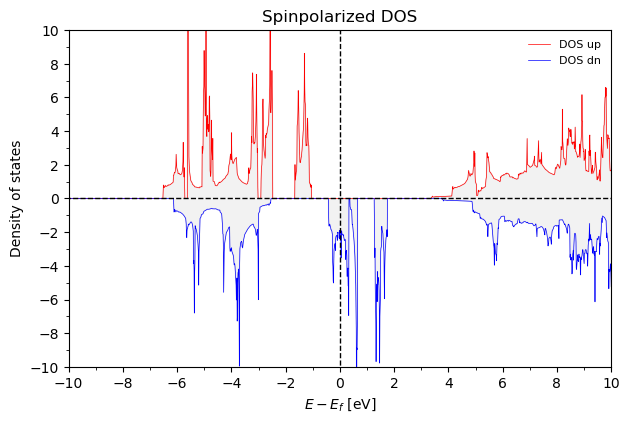

In [86]:
calc.plot_FullDOS(efrom=-10, eto=10)

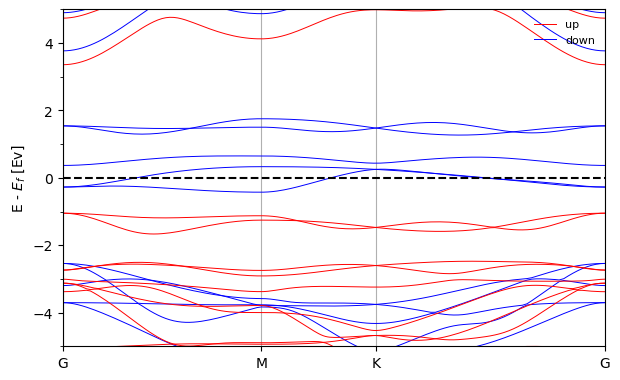

In [73]:
calc.plot_BS(efrom=-5, eto=5)

In [74]:
calc.print_bands_range(7, 20)

efermi -1.97
-------------SPIN UP---------------
band 8 eV from  -7.59 to  -7.01                 eV-eF from  -5.62 to  -5.05
band 9 eV from  -7.55 to  -6.85                 eV-eF from  -5.58 to  -4.89
band 10 eV from  -6.90 to  -5.30                 eV-eF from  -4.94 to  -3.34
band 11 eV from  -6.74 to  -5.09                 eV-eF from  -4.78 to  -3.13
band 12 eV from  -6.50 to  -5.09                 eV-eF from  -4.53 to  -3.13
band 13 eV from  -5.35 to  -4.98                 eV-eF from  -3.38 to  -3.01
band 14 eV from  -4.88 to  -4.53                 eV-eF from  -2.91 to  -2.56
band 15 eV from  -4.72 to  -4.44                 eV-eF from  -2.75 to  -2.48
band 16 eV from  -3.64 to  -3.02                 eV-eF from  -1.67 to  -1.05
band 17 eV from  -3.44 to  -3.02                 eV-eF from  -1.47 to  -1.05
band 18 eV from  1.39 to  3.09                 eV-eF from  3.36 to  5.06
band 19 eV from  2.77 to  4.91                 eV-eF from  4.74 to  6.87
band 20 eV from  3.11 to  5.40       

In [75]:
calc.get_pDOS()

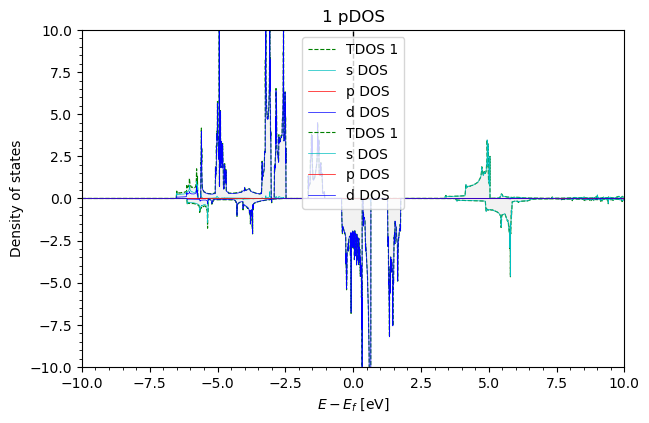

In [76]:
calc.plot_pDOS('1', efrom=-10, eto=10, yfrom=-10)

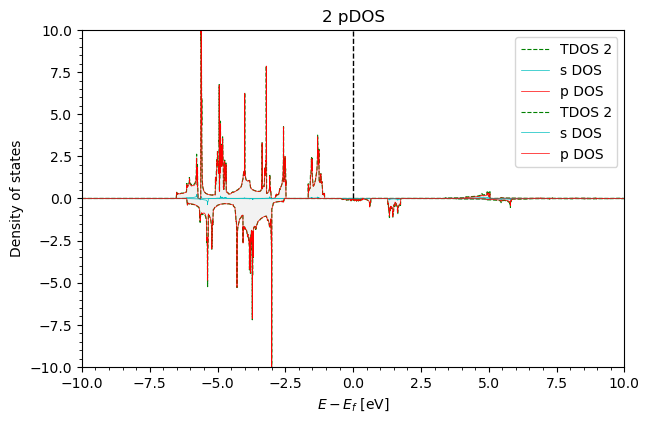

In [77]:
calc.plot_pDOS('2', efrom=-10, eto=10, yfrom=-10)

# Wannier bands

In [78]:
calc.load_wannier(kpath_filename='kpath_qe2.dat')

nwa  9
Rpts 343
we have 2D hamiltonian
nwa  9
Rpts 343
we have 2D hamiltonian


100%|██████████| 31/31 [00:00<00:00, 518.05it/s]


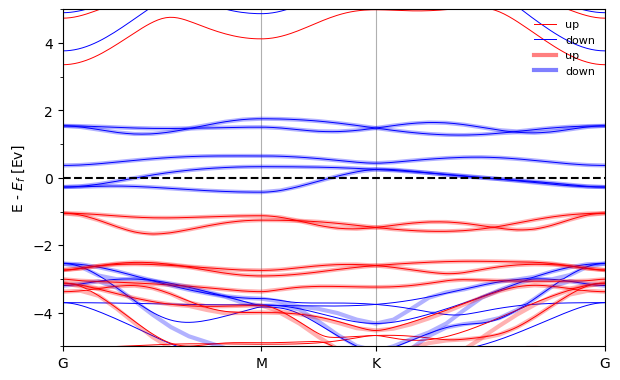

In [79]:
#interpolate the bands, on the plot bolds are interpolated wannier bands
calc.plot_wannier_BS(efrom=-5, eto=5)

In [80]:
#now we want to plot the wannier bands on several BZ (normally you don't need to do this)

loader = wannier_loader.Wannier_loader_FM('./', 'FeCl2')

acell = np.linalg.norm(calc.acell[0]) # AA
b1 = calc.bcell[0][:2] / (2. * np.pi / acell)  # First reciprocal lattice vector in units of 2pi/a
b2 = calc.bcell[1][:2] / (2. * np.pi / acell) # Second reciprocal lattice vector in units of 2pi/a



nwa  9
Rpts 343
we have 2D hamiltonian
nwa  9
Rpts 343
we have 2D hamiltonian


In [81]:
klim = 1.0 # want to have data in range [-1, 1] (in units of 2pi/a)
nkpt = 20

bs, _ = loader.get_dense_hk_symmetric(nkpt=nkpt, krange=klim, find_eigsQ=True)


  0%|          | 0/1600 [00:00<?, ?it/s]

100%|██████████| 1600/1600 [00:02<00:00, 534.99it/s]


In [82]:
band_str_up = bs[:,:,0] # choose spin up
band_str_dn = bs[:,:,1]


In [83]:

# k fractional
kpoints_adj_serial = np.mgrid[-klim:klim:1.0/nkpt, -klim:klim:1.0/nkpt].reshape(2,-1).T
x = kpoints_adj_serial[:, 0] 
y = kpoints_adj_serial[:, 1] 


# k cartisian (2 pi / alat)
coords = [ x[i]  * b1 + y[i]* b2 for i in range(len(x))] # repr cart in 2 pi / alat
coords = np.array(coords)
kx = coords[:, 0] 
ky = coords[:, 1] 




In [84]:
z = np.real(band_str_dn[ 5, :] - calc.efermi) # 7th band for example

fig = go.Figure()
fig.add_trace(go.Contour(x=kx,y=ky,z=z,line_smoothing=1.3))

# fermi level
contour_trace = go.Contour(
    z=z,
    x=kx,
    y=ky,
    contours=dict(
        start=0,
        end=0,
        size=0.1,
        coloring='lines'
    ),
    showscale=False,
    line=dict(width=2)
)
fig.add_trace(contour_trace)



# Hexagonal Brillouin Zone vertices
BZ_vertices = np.array([
    0.666 * b1 - 0.333 * b2, 
    0.333 * b1 + 0.333 * b2, 
    -0.333 * b1 + 0.666 * b2, 
    -0.666 * b1 + 0.333 * b2, 
    -0.333 * b1 - 0.333 * b2, 
    0.333 * b1 - 0.666 * b2,
    0.666 * b1 - 0.333 * b2])

# High-symmetry points in units of (2π/a)
Gamma = np.array([0, 0])
M = 0.5 * b2
K = -0.3333333333 * b1 + 0.6666666667 * b2


# Add arrows for b1 and b2
fig.add_annotation(
    x=b1[0], y=b1[1],
    ax=0, ay=0,
    xref="x", yref="y",
    axref="x", ayref="y",
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="green",
    text="b1",
    font=dict(size=12, color="green"),
    yshift=0
)

fig.add_annotation(
    x=b2[0], y=b2[1],
    ax=0, ay=0,
    xref="x", yref="y",
    axref="x", ayref="y",
    showarrow=True,
    arrowhead=3,
    arrowsize=2,
    arrowwidth=2,
    arrowcolor="purple",
    text="b2",
    font=dict(size=12, color="purple"),
    yshift=0
)

# Path: Γ → M → K → Γ
path = np.array([Gamma, M, K, Gamma])

# Plot high-symmetry points
high_symmetry_labels = ['Γ', 'M', 'K']
high_symmetry_points = [Gamma, M, K]
for point, label in zip(high_symmetry_points, high_symmetry_labels):
    fig.add_trace(go.Scatter(
        x=[point[0]], 
        y=[point[1]], 
        mode='markers+text',
        text=[label],
        textposition="top center",
        marker=dict(color='red', size=10),
        name=label,
        showlegend=False
    ))
    
# Plot path
fig.add_trace(go.Scatter(
    x=path[:, 0], 
    y=path[:, 1], 
    mode='lines+markers', 
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(color='red', size=6),
    name='Path: Γ → M → K → Γ',
    showlegend=False
))


# Plot BZ
fig.add_trace(go.Scatter(
    x=BZ_vertices[:, 0], 
    y=BZ_vertices[:, 1], 
    mode='lines', 
    line=dict(color='black', width=2),
    showlegend=False
))



fig.update_layout(
    autosize=False,
    width=800,  # Width of the figure
    height=800,  # Height of the figure
    xaxis=dict(
        scaleanchor="y",  # Match the scale of the x-axis with the y-axis
        title="kx cart in 2 pi / alat",
        range=[-1, 1]
    ),
    yaxis=dict(title="ky cart in 2 pi / alat", range=[-1, 1]),
    title="band str a.u. in FeCl2"
)
fig.show()

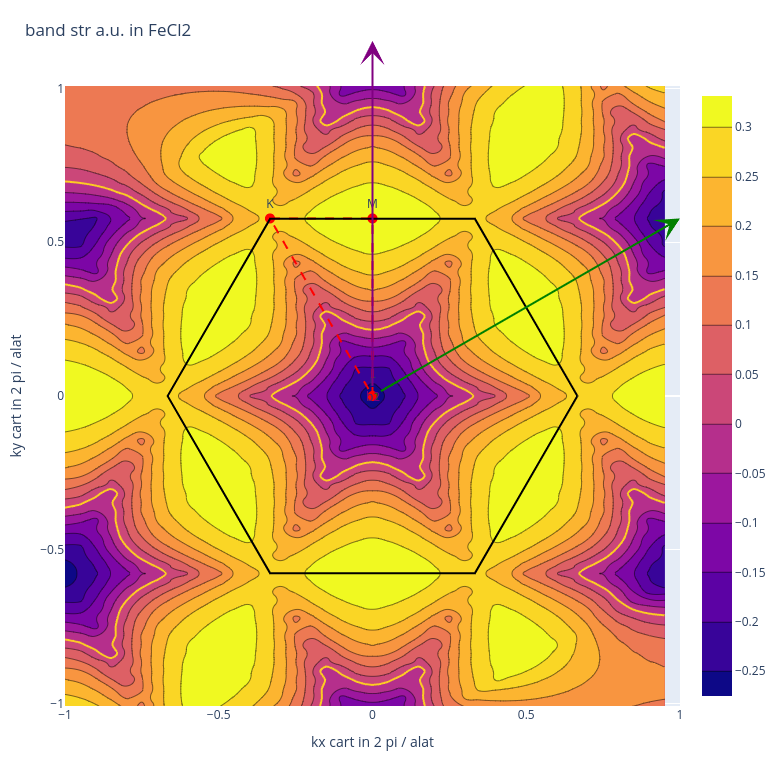